# Unsupervised Learning (Team_JM1_#Awesome Project Solution)

### © Explore Data Science Academy

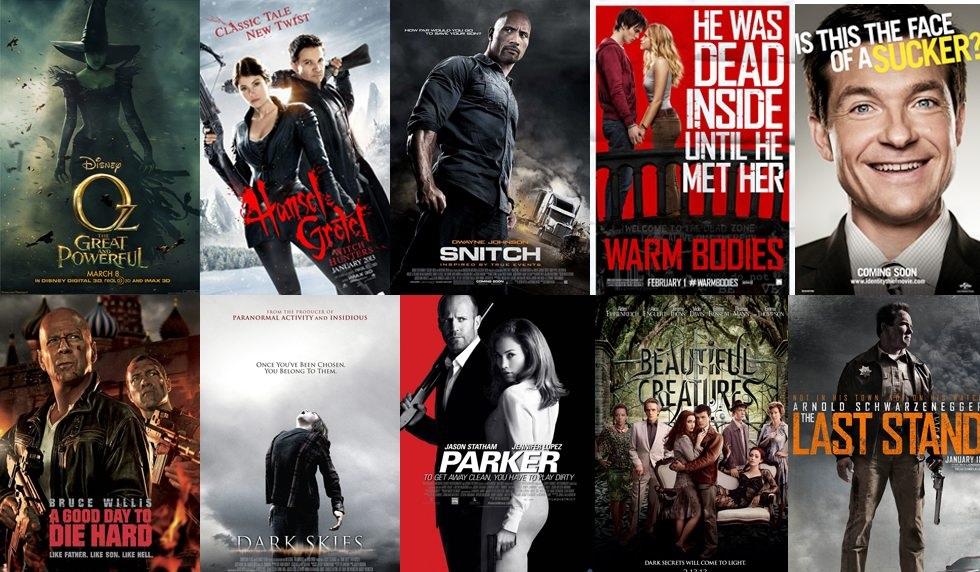

<br>
<br>

## Overview: Movie Recommendation System 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.


The objective of this project was to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution in this project has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.  

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.

<br>
<br>

<a id="cont"></a>

## Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>     

<a href=#eight>8. Conclusion</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [1]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Building recommender systems
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.matutils import cossim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# For Unsupervised Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import KNNBaseline, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering

# Import time to measure algorithm runtime 
from time import time
from datetime import datetime

# Turn off or ignore minor warnings that may pop-up while executing codes.
import warnings 
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

# Garbage Collector
import gc

C:\Users\yinka\AppData\Local\Temp\ipykernel_3884\780261052.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Movies Dataset from MovieLens Database and IMDB

Two datasets was used majorly in this project,namely;

- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data. This dataset was used for the Kaggle submission in the competition in which all teams were required to participate

<br>

- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data. This dataset was used for the training and evaluation of our machine learning models

In [2]:
movies_df = pd.read_csv("resources/data/movies.csv")
movies_df.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [3]:
movies_df.info()
#checking the shape
k, l = movies_df.shape
print(f'movies_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
movies_df contains 62423 rows and 3 columns


In [4]:
train_df = pd.read_csv("resources/data/ratings.csv")
train_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
train_df.info()
#checking the shape
k, l = train_df.shape
print(f'train_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
train_df contains 100004 rows and 4 columns


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section, we will perform some indepth analysis on our datasets with the use of visualizations.

We will also look at ratings distribution of the data which will be illustrated using graphs.

Confirming the size of the datasets

In [ ]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which tells the shape of each of our datasets
"""

# List Names of Data sets
Df_names = ['Movies Data', 'IMDB Data', 'Tags Data', 'Genome_Scores Data', 'Genome_Tags Data', 'Train Data', ]
# Generate a list of each data size
observations = [movies_df.shape[0], imdb_df.shape[0], tags_df.shape[0], 
                genomescores_df.shape[0], genometags_df.shape[0], train_df.shape[0]]
columns = [movies_df.shape[1], imdb_df.shape[1], tags_df.shape[1], 
           genomescores_df.shape[1], genometags_df.shape[1], train_df.shape[1]]

# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(Df_names, observations, columns)), columns=['Dataframe', 'Observations', 'Columns'])
size_df

**What do we observe here?**    
Each of these datasetas have different number of observations. But these datasets can however be related to one another with the `movieId` feature which is found on all the datasets.     

There are 10 million+ observations for training & validation (which could be a problem for systems with low computing power) which is a BIG DATA and this is a whole lot of Dataset to manipulate through.

Genome_Scores Data, which is a score mapping the strength between movies and tag-related properties being over 15 Million in size.

`timestamp` column can be found in `tags_df` and `train_df` which isn't particularly useful for our recommendation algorithm building and the time a movie was being rated nothing to do with a user's preferences or the quality of a film. BUT, the timestamps could, however, provide some meaningful insights in our EDA.

We may have to reduce the dimesionality of the dataset along the way.

**Calculating our total number of users:** since the `train_df` has the highest number of observations, lets us use it to calculate our total number of users.

In [6]:
# Number of users

unique_users = len(train_df['userId'].unique().tolist())
print(f'The total number of users are {unique_users}')

The total number of users are 671


In [7]:
# Number of movies

unique_users = len(train_df['movieId'].unique().tolist())
print(f'The total number of movies are {unique_users}')

The total number of movies are 9066


#### Lowest and Highest rating

In [8]:
# minimum and maximum ratings

min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Lowest rating: 0.5
Highest rating: 5.0


#### Distributions of ratings

In [9]:
# Creating a class distribution in a dataframe
ratings_dist = pd.DataFrame(list(train_df['rating'].value_counts()),
                          index=train_df['rating'].unique(),
                          columns=['Rating count'])

ratings_dist

,Rating count
2.5,28750
3.0,20064
2.0,15095
4.0,10538
3.5,7723
1.0,7271
5.0,4449
4.5,3326
1.5,1687
0.5,1101


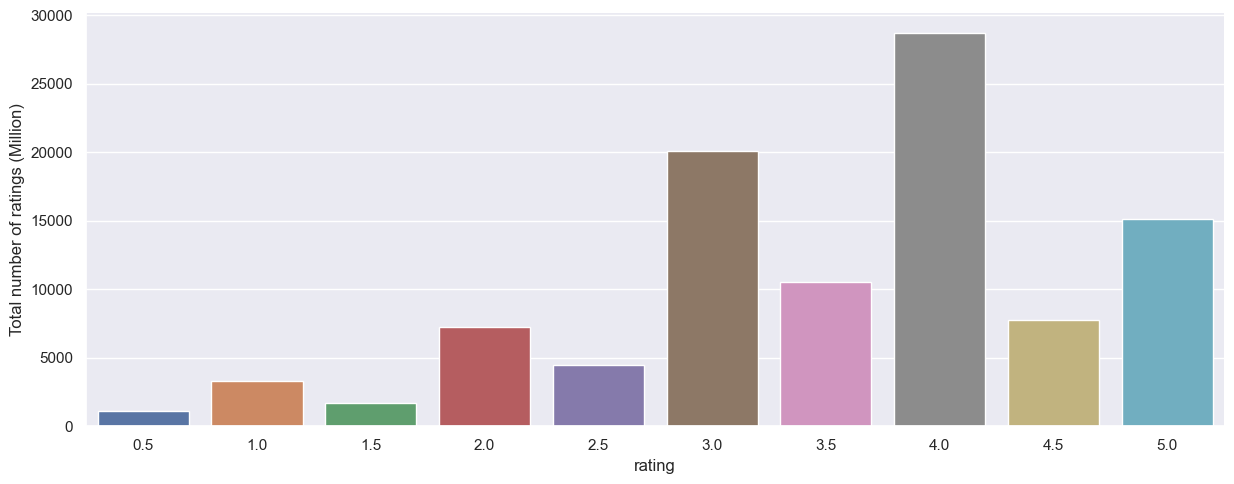

In [10]:
# Let's Visualise the Distribution of Rating in our Actual Train Data

with sns.axes_style('darkgrid'):
    g = sns.catplot(x="rating", data=train_df, aspect=2.5, kind='count')
    g.set_ylabels("Total number of ratings (Million)");

In [11]:
print (f'Total Number of ratings in train_df: {train_df.shape[0]}')
print (f'Average rating in train_df: {np.mean(train_df["rating"])}')

Total Number of ratings in train_df: 100004
Average rating in train_df: 3.543608255669773


cleaning up `movies_df` features

In [12]:
# Convert data types to strings for string handling
movies_df['title'] = movies_df.title.astype(str)
movies_df['genres'] = movies_df.genres.astype(str)

# Discarding the pipes between the genres 
movies_df['genres'] = movies_df['genres'].map(lambda x: x.lower().split('|'))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

# Extracting the release year from the titles
def get_release_dates(title):
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

# Creating the release year by extracting the release year from the movie title
movies_df['release_year'] = movies_df['title'].apply(get_release_dates)

# removing the year from the titles
#movies_df['title'] = movies_df['title'].map(lambda x: str(x)[:-6])

movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story (1995),adventure animation children comedy fantasy,1995
1,2,Jumanji (1995),adventure children fantasy,1995
2,3,Grumpier Old Men (1995),comedy romance,1995
3,4,Waiting to Exhale (1995),comedy drama romance,1995
4,5,Father of the Bride Part II (1995),comedy,1995


<br>

For ease of analysis of the data, the train dataframe will be merged with the movies dataframe based on the `movieId`.

In [13]:
# adding movie titles and genres to train_df
train_df = train_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')
#train_df.drop(train_df[["title_x","genres_x", "title_y","genres_y"]], axis=1, inplace=True) 
train_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),drama
1,1,1029,3.0,1260759179,Dumbo (1941),animation children drama musical
2,1,1061,3.0,1260759182,Sleepers (1996),thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),action adventure sci-fi thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),drama


In [14]:
# checking to see if there are null values
train_df.isnull().sum()

userId         0
movieId        0
rating         0
timestamp      0
title        443
genres       443
dtype: int64

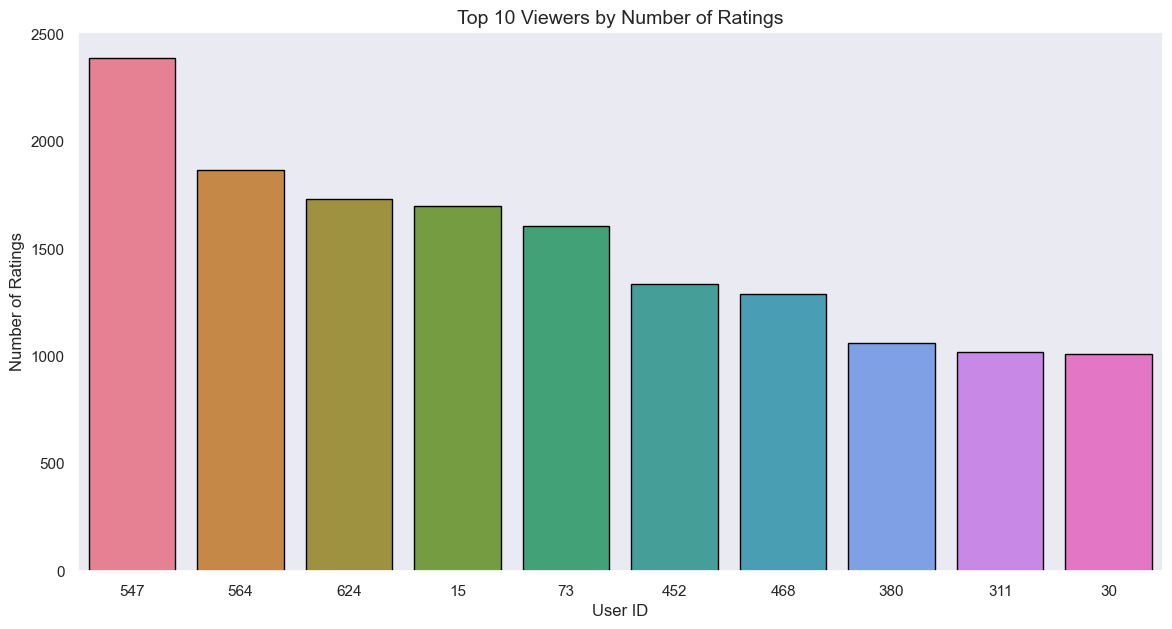

In [15]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette="husl", edgecolor="black")
   
    plt.title(f'Top {n} Viewers by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df,10)

Our top movie rater(user 72315) has rated over 12,000 movies. It could be that this user rates any movie he/she watches. Or possibly a group of viewers sharing one userID.

### Most rated movies

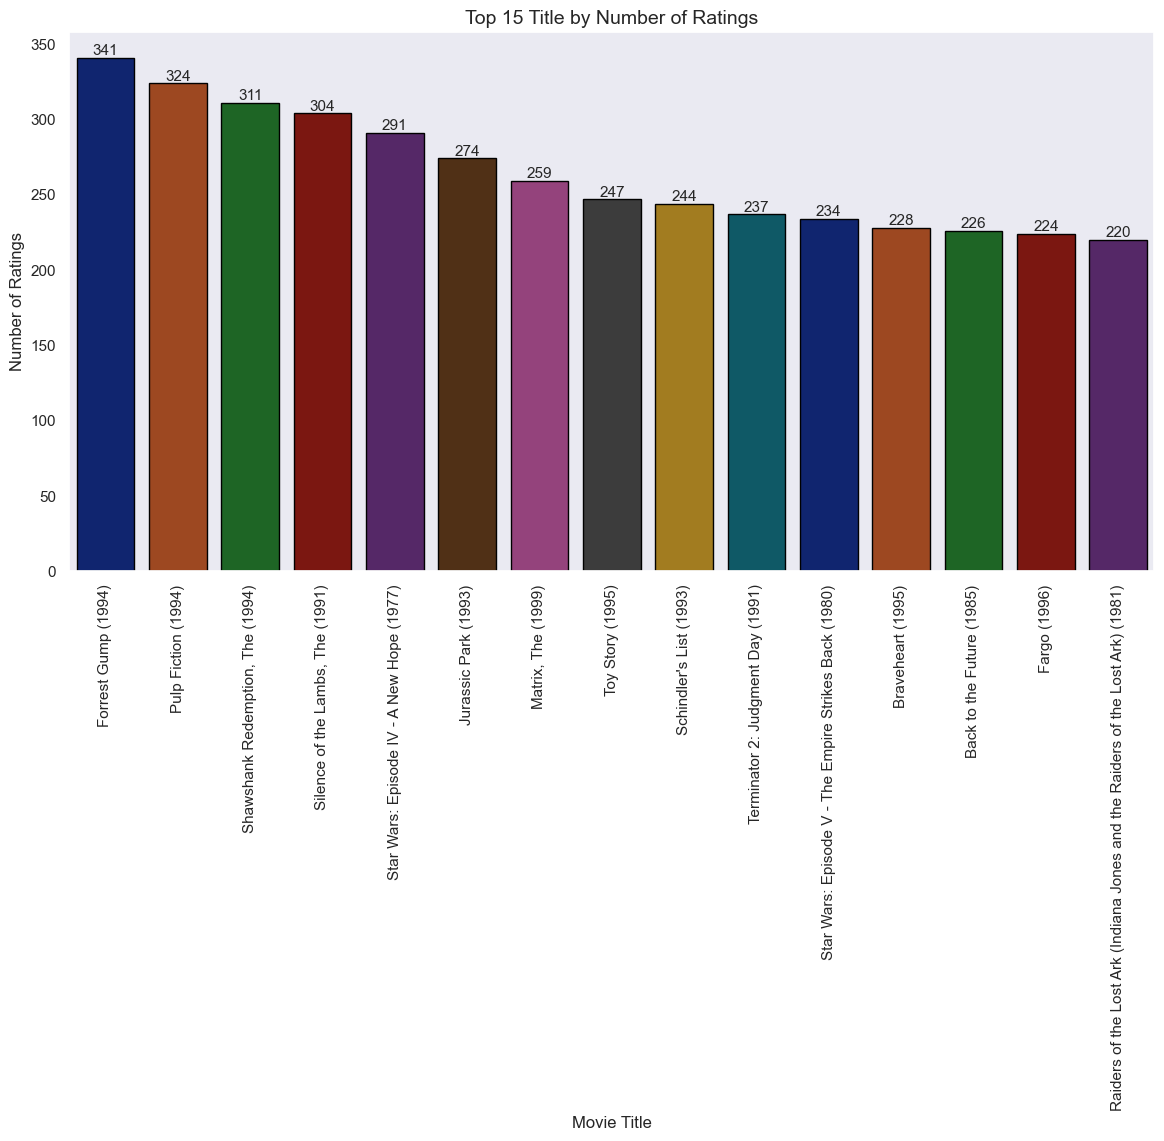

In [16]:
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='dark', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Movie Title')
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

# Call Function to get the top 10
top_rating_plot(train_df,'title',15)

To be honest, it is a big suprise not to see the Titanic movie among the top 15 rated movies. But there are other popular movies like Star Wars, Lord of the Rings, Terminator. 

Let us take a look at the most popular movie genre

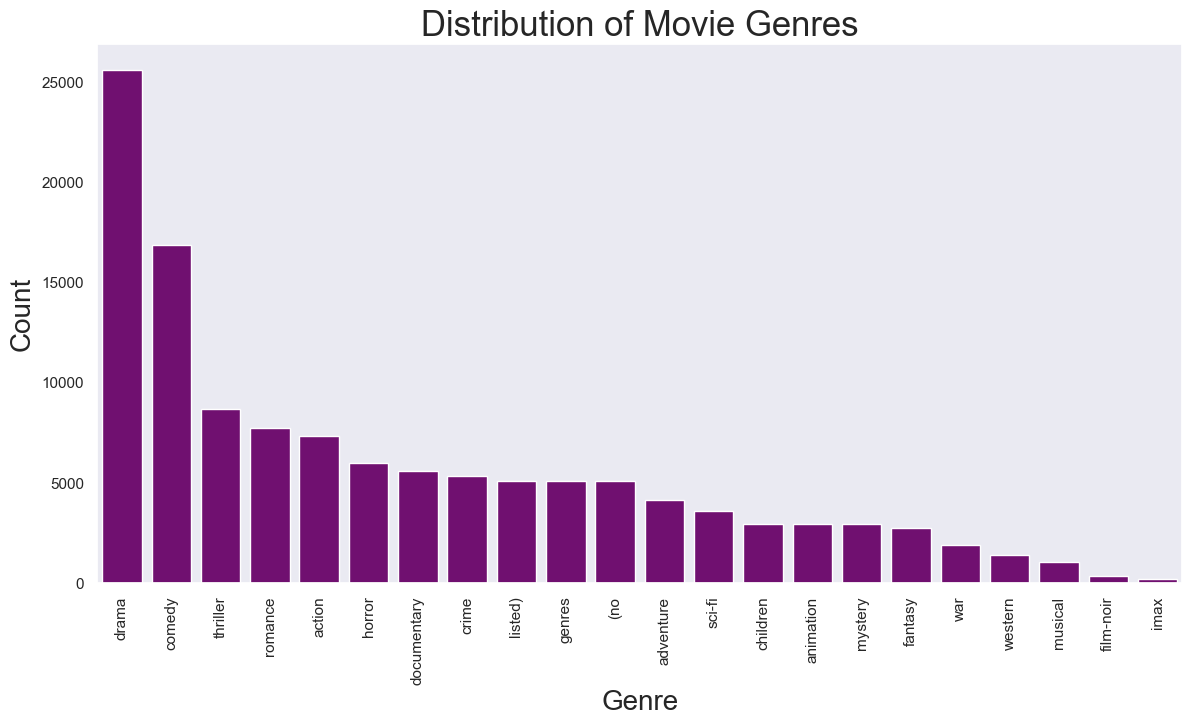

In [17]:
# Getting movies genres from 'genres' column (a movie may have more than one)
movie_genres = pd.DataFrame(movies_df['genres'].str.split(" ").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']

fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, color='purple',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()